## 🚜 Predicting the Sale Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

### 1. Problem definition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

### 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

### 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. 

* #### Data Dictionary :

 
* SalesID:	  unique identifier of a particular sale of a machine at auction
* MachineID:	  identifier for a particular machine;  machines may have multiple sales
* ModelID:	  identifier for a unique machine model (i.e. fiModelDesc)
* datasource: source of the sale record;  some sources are more diligent about reporting attributes of the machine than others. 
* auctioneerID	  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.
* YearMade	  year of manufacturer of the Machine
* MachineHoursCurrentMeter	  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
* UsageBand	  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
* Saledate	  time of sale
* Saleprice	  cost of sale in USD
* fiModelDesc	  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
* fiBaseModel	  disaggregation of fiModelDesc
* fiSecondaryDesc	  disaggregation of fiModelDesc
* fiModelSeries	  disaggregation of fiModelDesc
* fiModelDescriptor	  disaggregation of fiModelDesc
* ProductSize	  Don't know what this is 
* ProductClassDesc	  description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
* State	  US State in which sale occurred
* ProductGroup	  identifier for top-level hierarchical grouping of fiModelDesc
* ProductGroupDesc	  description of top-level hierarchical grouping of fiModelDesc
* Drive_System	machine configuration;  typcially describes whether 2 or 4 wheel drive
* Enclosure	machine configuration - does machine have an enclosed cab or not
* Forks	machine configuration - attachment used for lifting
* Pad_Type	machine configuration - type of treads a crawler machine uses
* Ride_Control	machine configuration - optional feature on loaders to make the ride smoother
* Stick	machine configuration - type of control 
* Transmission	machine configuration - describes type of transmission;  typically automatic or manual
* Turbocharged	machine configuration - engine naturally aspirated or turbocharged
* Blade_Extension	machine configuration - extension of standard blade
* Blade_Width	machine configuration - width of blade
* Enclosure_Type	machine configuration - does machine have an enclosed cab or not
* Engine_Horsepower	machine configuration - engine horsepower rating
* Hydraulics	machine configuration - type of hydraulics
* Pushblock	machine configuration - option
* Ripper	machine configuration - implement attached to machine to till soil
* Scarifier	machine configuration - implement attached to machine to condition soil
* Tip_control	machine configuration - type of blade control
* Tire_Size	machine configuration - size of primary tires
* Coupler	machine configuration - type of implement interface
* Coupler_System	machine configuration - type of implement interface
* Grouser_Tracks	machine configuration - describes ground contact interface
* Hydraulics_Flow	machine configuration - normal or high flow hydraulic system
* Track_Type	machine configuration - type of treads a crawler machine uses
* Undercarriage_Pad_Width	machine configuration - width of crawler treads
* Stick_Length	machine configuration - length of machine digging implement
* Thumb	machine configuration - attachment used for grabbing
* Pattern_Changer	machine configuration - can adjust the operator control configuration to suit the user
* Grouser_Type	machine configuration - type of treads a crawler machine uses
* Backhoe_Mounting	machine configuration - optional interface used to add a backhoe attachment
* Blade_Type	machine configuration - describes type of blade
* Travel_Controls	machine configuration - describes operator control configuration
* Differential_Type	machine configuration - differential type, typically locking or standard
* Steering_Controls	machine configuration - describes operator control configuration


Note that a particular datasource may report on multiple auctioneerIDs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Loading the data

In [4]:
df = pd.read_csv('Data for Bulldozer Sales Time series regression problem/TrainandValid.csv', low_memory=False)
#low memory=False used to remove the error nothing special

## Exploratory Data Analysis or EDA
1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types
3. What's missing from the data aand how do we deal with it
4. Where are the outliers and why should you care about them
5. How can you add, change or remove features to make your data more meaningful and to get more out of it

In [15]:
print(df.shape)
df.head()

(412698, 53)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [24]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

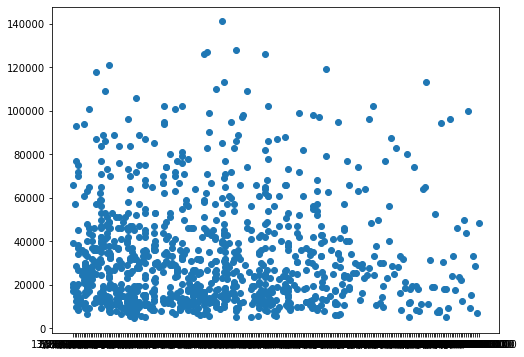

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

The date looks like a bar code in X axis :(

In [30]:
df.saledate.dtype

dtype('O')

In [31]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

Lets convert saledate dtype object to datetime

We can convert it by parsing dates while importing the dataset itself

In [5]:
df = pd.read_csv('Data for Bulldozer Sales Time series regression problem/Trainandvalid.csv', 
                 low_memory = False,
                 parse_dates=['saledate'])

In [36]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

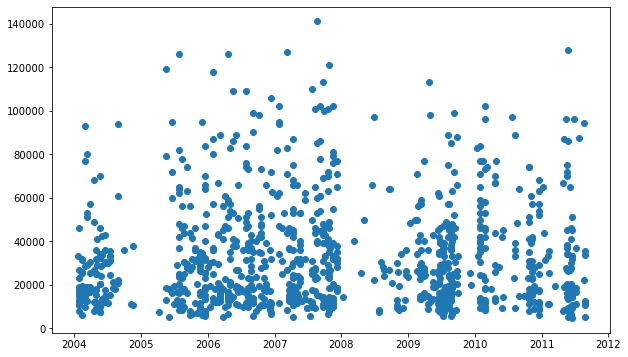

In [39]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

<AxesSubplot:>

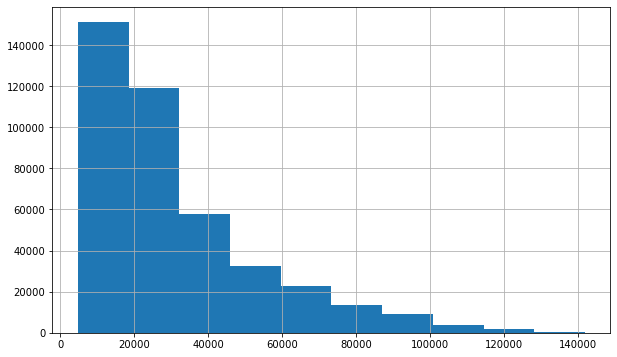

In [40]:
fig, ax = plt.subplots(figsize = (10,6))
df.SalePrice.hist();

We cannot see all the columns because  they are truncated as the number is large to accommodate all (53 columns)

In [41]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Lets look at our Saledate Column

In [43]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

We see the dates are not sorted 

### Lets sort the df completely by date to  help in EDA.

* For any time series problem sorting the dataframe by date is a healthy practice

In [47]:
df.sort_values(by=['saledate'], ascending=True, inplace = True)

In [48]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy of the original Dataframe


We make a copy of the dataframe so that when we manipulate the copy we still have our original dataframe reserved
* df - Original dataframe with sorted date
* df_temp - Copy of Original dataframe with sorted date ready to be experimented with 

In [6]:
df_temp = df.copy()
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Feature Engineering:

* Modifying the features of original dataset to get more insight into our data which will also help our machine lerning model to find patterns

* Dates do have a lot of information to tell us so in order to extract this information we can use many attributes of datetime module for ex we can get the sale year the quarterly sales, the yearly sales and many more so lets do it

So we will create a Column in our temporary df as this copy is just for manipulation (since we are adding another column)

In [7]:
df_temp['Sales_Year'] = df_temp['saledate'].dt.year
df_temp['Sales_Month'] = df_temp.saledate.dt.month
df_temp['Sales_Day'] = df_temp.saledate.dt.day
df_temp['Sales_DayofWeek'] = df_temp.saledate.dt.dayofweek
df_temp['Sales_DayofYear'] = df_temp.saledate.dt.dayofyear

In [141]:
df_temp.iloc[:5, -5:]

,Sales_Year,Sales_Month,Sales_Day,Sales_DayofWeek,Sales_DayofYear
205615,1989,1,17,1,17
274835,1989,1,31,1,31
141296,1989,1,31,1,31
212552,1989,1,31,1,31
62755,1989,1,31,1,31


### Note : Monday = 0, Sunday = 6 for day of week

In [142]:
df_temp.Sales_DayofWeek.value_counts()

3    124218
2     92137
1     77175
5     44517
4     44133
0     24275
6      6243
Name: Sales_DayofWeek, dtype: int64

#### Now that we have extracted complete data from our saledate column I think now we don't need it anymore Althogh we can extract even more if we wish to from the above attributes table but we won't do that

In [8]:
df_temp.drop('saledate', axis = 1, inplace = True )

In [144]:
df_temp.head(3).T

,205615,274835,141296
SalesID,1646770,1821514,1505138
SalePrice,9500.0,14000.0,50000.0
MachineID,1126363,1194089,1473654
ModelID,8434,10150,4139
datasource,132,132,132
auctioneerID,18.0,99.0,99.0
YearMade,1974,1980,1978
MachineHoursCurrentMeter,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G


In [145]:
df_temp.shape

(412698, 57)

In [146]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

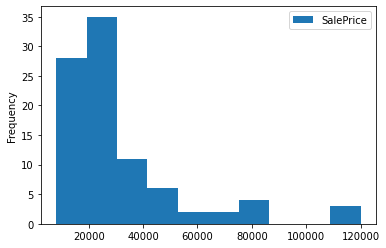

In [147]:
df_temp.SalePrice[:100][df_temp.state == 'Florida'].plot.hist()
plt.legend();

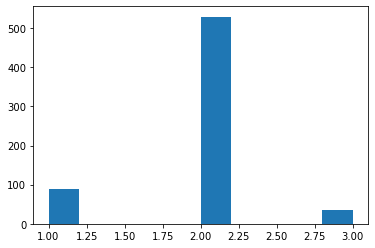

In [148]:
plt.hist(df_temp.Sales_DayofWeek[:1000][df_temp.state == 'Florida']);

## 5. Modelling

### This dataset consists of a lot non numric data and a lot of missing values we can just check once

In [149]:
df_temp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [114]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Convert String to categories

One way we can turn all of our data into numbers is by converting them into pandas categories

Dtypes related Functionality : https://pandas.pydata.org/docs/reference/general_utility_functions.html#bug-report-function

In [150]:
pd.api.types.is_string_dtype(df_temp.UsageBand)

True

In [151]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [152]:
pd.api.types.is_string_dtype(df_temp.fiProductClassDesc)

True

### Finding the columns with `dtype = str`

In [9]:
string_labels = []
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content) == True:
        string_labels.append(label)

for i in range(0,len(string_labels)):
    print(string_labels[i])

len(string_labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


44

* We have to convert all these non numeric labels into numeric label
* So lets do it
* But before that we have to convert these 'object' values in categorical values 

In [10]:
for labels, content in df_temp.items():
    if pd.api.types.is_string_dtype(content)==True:
        df_temp[labels] = content.astype("category").cat.as_ordered()

# as_ordered() arranges our string data (that is now converted to category (numeric)) in alphabetical order thats all

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [10]:
df_temp.state.cat.categories 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

### Quick Insight into above code
As expected they are sorted in alphabetical order (`cat.as_ordered()`) and now these category dtype features (which may appear as string as in the above code) are converted to numbers as an ndarray its dtype is still object but behind the scenes pandas is treating it as a numeric value we can even check how the codes are distributed for let us say state category

In [11]:
df_temp.state.cat.codes.value_counts()

8     67320
43    53110
4     29761
48    16222
9     14633
19    13322
23    13240
34    12369
12    11540
5     11529
29    11156
32    10636
42    10298
0     10292
37    10234
40     9951
2      9364
31     8639
6      8276
22     7885
24     7178
27     6932
17     6627
16     5351
18     5096
13     4124
3      3933
30     3631
45     3046
44     2801
51     2745
28     2738
47     2353
11     2025
36     1911
21     1831
52     1672
25     1336
14     1336
35     1326
26      866
50      840
15      667
7       510
33      480
1       430
20      347
46      300
41      244
10      118
39       83
38       42
49        2
dtype: int64

### Shoutout to pandas categories

* So thanks to Pandas Categories we now have a way to access all of our data in the form of numbers
* Remember we haven't changed the dtype of the string data (or non numeric data) just stuffed the non numeric data into category dtype where it has assigned every nun numeric label a code (for example arizona state is now evaluated by pandas as some code (let us say 3))
* We can also use `OneHotEncoder` or `LabelEncoder` to do the job

## Now moving on with Filling Missing Data

In [12]:
df_temp.isna().sum()/len(df_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

Dang Boi! too much missing data percentage in almost 70% of labels

Dammit!!

## Important Note
> We have made a lot of changes in our original dataset like droping a few columns categorizing some labels, so we want to save this dataset as a new csv so of in case we have to reimport our dataset we can import this one instead of the original

In [179]:
# Exporting our dataset
#df_temp.to_csv('Data for Bulldozer Sales Time series regression problem/manipulated_dataset.csv', index = False)

In [180]:
# Now lets import our dataset
#bulldozer = pd.read_csv('Data for Bulldozer Sales Time series regression problem/manipulated_dataset.csv', low_memory = False)

C:\Users\abhi2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
for label, content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


## Fill Missing "Numeric Data"

In [12]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
Sales_Year
Sales_Month
Sales_Day
Sales_DayofWeek
Sales_DayofYear


In [13]:
#Checking for missing data in numeric datatype features
lab = []
missing = []
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        lab.append(label) 
        missing.append(df_temp[label].isna().sum())

In [16]:
dict(zip(list(lab), list(missing)))

{'SalesID': 0,
 'SalePrice': 0,
 'MachineID': 0,
 'ModelID': 0,
 'datasource': 0,
 'auctioneerID': 20136,
 'YearMade': 0,
 'MachineHoursCurrentMeter': 265194,
 'Sales_Year': 0,
 'Sales_Month': 0,
 'Sales_Day': 0,
 'Sales_DayofWeek': 0,
 'Sales_DayofYear': 0}

So lets fill `auctioneerID` and `MachineHoursCurrentMeter`

This time we will be filling the numeric data with median() and also Make a new column with True and False values for rows in whch we filled the missing values so that after filling we know that it was filled by us  

In [14]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"_ismissing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [18]:
df_temp.auctioneerID_ismissing.value_counts(),df_temp.MachineHoursCurrentMeter_ismissing.value_counts()

(False    392562
 True      20136
 Name: auctioneerID_ismissing, dtype: int64,
 True     265194
 False    147504
 Name: MachineHoursCurrentMeter_ismissing, dtype: int64)

This means we created two columns (as two numeric columns contained missing values) filled them up with bullean values with True where values are filld and False where values are not filled  

In [217]:
df_temp.iloc[:5,-3:]

,Sales_DayofYear,auctioneerID_ismissing,MachineHoursCurrentMeter_ismissing
205615,17,False,True
274835,31,False,True
141296,31,False,True
212552,31,False,True
62755,31,False,True


In [222]:
df_temp.loc[:, ['auctioneerID','auctioneerID_ismissing']].head()

,auctioneerID,auctioneerID_ismissing
205615,18.0,False
274835,99.0,False
141296,99.0,False
212552,99.0,False
62755,99.0,False


## Filling Categorical Values 
Categorical Values - Non numeric data which is assigned a code by pandas categorical

In [21]:
df_temp.UsageBand.cat.codes

0         1
1         1
2         0
3         0
4         2
         ..
412693   -1
412694   -1
412695   -1
412696   -1
412697   -1
Length: 412698, dtype: int8

In [15]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'_ismissing'] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes + 1
        #+1 because, by default every missing value in a label gets filled with -1 code (as evident in above code) when converting to numeric value by pandas categorical, so we dont want a negative value thats why + 1 

In [25]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mounting_ismissing     0
Blade_Type_ismissing           0
Travel_Controls_ismissing      0
Differential_Type_ismissing    0
Steering_Controls_ismissing    0
Length: 103, dtype: int64

In [26]:
df_temp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_ismissing,True,True,True,True,True
Blade_Type_ismissing,True,True,True,True,True
Travel_Controls_ismissing,True,True,True,True,True
Differential_Type_ismissing,False,False,True,True,True


In [16]:
for label, content in df_temp.items():
    if pd.api.types.is_bool_dtype(content):
        print(label)

auctioneerID_ismissing
MachineHoursCurrentMeter_ismissing
UsageBand_ismissing
fiModelDesc_ismissing
fiBaseModel_ismissing
fiSecondaryDesc_ismissing
fiModelSeries_ismissing
fiModelDescriptor_ismissing
ProductSize_ismissing
fiProductClassDesc_ismissing
state_ismissing
ProductGroup_ismissing
ProductGroupDesc_ismissing
Drive_System_ismissing
Enclosure_ismissing
Forks_ismissing
Pad_Type_ismissing
Ride_Control_ismissing
Stick_ismissing
Transmission_ismissing
Turbocharged_ismissing
Blade_Extension_ismissing
Blade_Width_ismissing
Enclosure_Type_ismissing
Engine_Horsepower_ismissing
Hydraulics_ismissing
Pushblock_ismissing
Ripper_ismissing
Scarifier_ismissing
Tip_Control_ismissing
Tire_Size_ismissing
Coupler_ismissing
Coupler_System_ismissing
Grouser_Tracks_ismissing
Hydraulics_Flow_ismissing
Track_Type_ismissing
Undercarriage_Pad_Width_ismissing
Stick_Length_ismissing
Thumb_ismissing
Pattern_Changer_ismissing
Grouser_Type_ismissing
Backhoe_Mounting_ismissing
Blade_Type_ismissing
Travel_Control

In [32]:
pd.Categorical(df_temp.state).codes

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_ismissing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


## Splitting the Data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

We will create the train set, valid set and test set by hand

In [18]:
df_train = df_temp[df_temp.Sales_Year!=2012]
df_val = df_temp[df_temp.Sales_Year==2012]

In [19]:
df_temp.Sales_Year[df_temp.Sales_Year==2012].value_counts()
df_temp.Sales_Year[df_temp.Sales_Year!=2012].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: Sales_Year, dtype: int64

In [51]:
df_train.shape, df_val.shape

((401125, 103), (11573, 103))

In [20]:
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val['SalePrice']

In [21]:
y_train

0         66000.0
1         57000.0
2         10000.0
3         38500.0
4         11000.0
           ...   
401120    10500.0
401121    11000.0
401122    11500.0
401123     9000.0
401124     7750.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an Evaluation Function

In [34]:
from sklearn.metrics import r2_score, mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    rmsle_score = np.sqrt(mean_squared_log_error(y_test, y_preds))
    return rmsle_score

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE' : mean_absolute_error(y_train, train_preds),
              'Valid MAE' : mean_absolute_error(y_valid, val_preds),
              'Training RMSLE' : rmsle(y_train, train_preds),
              'Valid RMSLE' : rmsle(y_valid, val_preds),
              'Training R^2 Score' : r2_score(y_train, train_preds)*100,
              'Valid R^2 Score' : r2_score(y_valid, val_preds)*100}
    return scores

### `max_samples` hyperparameter
Out of 400k samples that we have if we fit each one of them it will take some time so the `max_samples` hyperparaters helps fit a subset of train data so that we save some time

In [26]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                             max_samples=10000,
                             random_state=42) #random_state is same as np.random.seed
model.fit(X_train, y_train)

Wall time: 8.58 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [35]:
show_scores(model)

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': 0.25758465681614984,
 'Valid RMSLE': 0.29248380187626777,
 'Training R^2 Score': 86.08402371243157,
 'Valid R^2 Score': 83.30859621785301}

### Hyperparameter Tuning with `RandomizedSearchCV`

In [61]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'max_depth': [None,3,5,10],
           'max_features': [0.5, 1, 'auto', 'sqrt'],
           'max_samples': [10000],
           'min_samples_leaf': np.arange(1,20,2),
           'min_samples_split': np.arange(2,20,2),
           'n_estimators': np.arange(10,100,10)}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=41),
                             param_distributions = rf_grid,
                             n_iter=5, 
                             cv = 5,
                             verbose = True) 

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 2min 36s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=41),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [63]:
%%time
ideal_model = RandomForestRegressor(n_estimators= 50,
                                    min_samples_split= 12,
                                    min_samples_leaf= 3,
                                    max_features= 'auto',
                                    max_depth= None,
                                    random_state = 41)

ideal_model.fit(X_train, y_train)
show_scores(ideal_model)

Wall time: 5min 5s


{'Training MAE': 2872.780193235807,
 'Valid MAE': 6076.456052466013,
 'Training RMSLE': 0.14424061278520658,
 'Valid RMSLE': 0.2502431704454926,
 'Training R^2 Score': 95.79826781471773,
 'Valid R^2 Score': 87.33671500723904}

### Making the test set same as Train and Valid set

In [80]:
X_test = pd.read_csv('Data for Bulldozer Sales Time series regression problem/Test.csv', 
                      parse_dates = ['saledate'],
                      low_memory = False)
X_test.shape

(12457, 52)

In [82]:
def preprocessing(df):
    df['Sales_Year'] = df.saledate.dt.year
    df['Sales_Month'] = df.saledate.dt.month
    df['Sales_Day'] = df.saledate.dt.day
    df['Sales_DayofWeek'] = df.saledate.dt.dayofweek
    df['Sales_DayofYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis = 1, inplace = True)
    
    #Filling numeric data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_ismissing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    #Filling non numeric data
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_ismissing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [84]:
X_test = preprocessing(X_test)

In [85]:
X_test.shape, X_train.shape

((12457, 101), (401125, 102))

In [86]:
set(X_train) - set(X_test)

{'auctioneerID_ismissing'}

In [87]:
X_test['auctioneerID_ismissing'] = False
X_test.shape

(12457, 102)

In [88]:
X_test.shape, X_train.shape

((12457, 102), (401125, 102))

In [96]:
test_preds = ideal_model.predict(X_test)
test_preds

array([21552.42651179, 19290.99217689, 52040.83651849, ...,
       12341.02510876, 17521.37907895, 29837.43128311])

In [106]:
final_submission = pd.DataFrame({'Sale Price': test_preds,
              'SalesID' : X_test.SalesID})
final_submission.head(n=20)

,Sale Price,SalesID
0,21552.426512,1227829
1,19290.992177,1227844
2,52040.836518,1227847
3,86305.449668,1227848
4,44209.727748,1227863
5,29621.525836,1227870
6,26107.789251,1227871
7,12402.223165,1227879
8,15888.063448,1227880
9,46635.278464,1227881


In [102]:
final_submission.to_csv('Data for Bulldozer Sales Time series regression problem/Final Submission.csv')

## Feature Importances
Lets find feature importances of our ideal model

In [107]:
ideal_model.feature_importances_

array([4.67894962e-02, 1.21870191e-02, 3.19627387e-02, 1.63862922e-04,
       2.92518238e-03, 2.72229158e-01, 2.24721514e-03, 7.64257847e-04,
       1.91458695e-02, 8.47123026e-02, 5.25985726e-02, 4.29733311e-03,
       3.32906865e-03, 2.37418221e-01, 4.00026175e-02, 6.00806218e-03,
       1.26227924e-04, 1.24011049e-04, 1.77152372e-03, 8.67118196e-03,
       2.21372421e-04, 1.98424593e-05, 3.99298179e-04, 1.70941951e-04,
       1.42065274e-03, 1.23523830e-05, 4.05658462e-05, 4.00743319e-03,
       1.21219422e-04, 4.32428046e-05, 3.96985006e-03, 1.99925922e-03,
       2.04514596e-03, 3.34500035e-03, 1.57480183e-04, 1.50172072e-03,
       7.01100728e-04, 1.50163425e-02, 3.87074193e-06, 1.88962053e-06,
       1.42976948e-04, 8.30125962e-04, 9.69974638e-04, 5.24673712e-04,
       1.81976017e-04, 2.73472327e-04, 1.95917698e-04, 1.25359687e-03,
       7.21523953e-04, 1.23247957e-04, 1.63066916e-04, 7.77369158e-02,
       1.86657019e-03, 5.87244221e-03, 2.76008185e-03, 1.18664502e-02,
      

In [112]:
X_train.shape[1], len(ideal_model.feature_importances_)

(102, 102)

## Lets visualize this

In [137]:
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({'features' : columns,
                        'feature importances' : importances
                       }).sort_values('feature importances', ascending = False)).reset_index(drop = True)
    
    fig, ax = plt.subplots(figsize = (8,6))
    ax.barh(df['features'][:n], df['feature importances'][:20])
    ax.set(title = 'Feature importance', ylabel = 'Features', xlabel = 'Feature Importances')
    ax.legend(['Feature Importances'])
    ax.invert_yaxis()

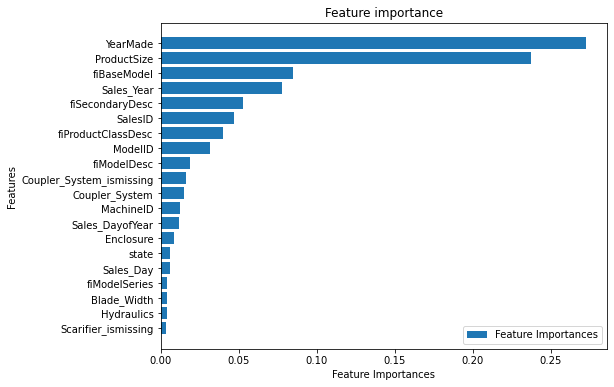

In [138]:
plot_features(X_train.columns, ideal_model.feature_importances_)